# What drives the price of a car?

**OVERVIEW**

This project digs into a large Kaggle dataset of used cars to answer a simple question: what really makes one car sell for more than another?​

Using basic data exploration and modeling, the goal is to spot which features buyers actually pay for.

The outcome is a clear set of insights and practical recommendations that a used car dealership can use to price cars smarter and highlight the features customers value most.

## 1. Business Understanding


#### 1.1 Business objective 
Understand which features have the biggest impact on selling price of used cars, so a used car dealership can price cars more accurately and highlight the attributes.

Success means dealers can:
- Set competitive prices faster and with more confidence.
- Increase profit per car while staying attractive to buyers.
- Use clear, data-backed insights (simple rules) in daily pricing decisions.

#### 1.2 Assess situation

The project uses a public Kaggle dataset of around 400K+ used cars, plus standard data science tools (Python, pandas, scikit-learn, and basic visualization libraries) on a Jupyter notebook.​

There is no live connection to a real dealership system, so all insights are offline and based only on the historical Kaggle data. Legal and privacy risks are low because the data is anonymized and public, but results may not fully reflect every local market or current price trends.​

Key constraints are limited time, and the need to keep outputs easy to understand for non-technical business users, such as used car managers. The main risks are poor data quality, data drift versus today’s market, and building models that are accurate on paper but too complex to be trusted or used in daily pricing.

#### 1.3 Data mining goal

Build and evaluate regression models that predict a car’s selling price from its features, and measure how well these models explain price differences across the dataset.

The analysis also aims to rank the most important features driving price, create simple pricing rules or ranges for key segments, and produce clear visual summaries that connect these technical results back to practical pricing decisions.

#### 1.4 Project plan

Phase 1 – Business understanding (done): 
Clarified main question, what drives used car prices, and how can pricing and inventory choices improve based on those patterns.

Phase 2 – Data understanding: 
Load the Kaggle used car dataset, inspect structure and basic stats, explore key features, and check for obvious issues or biases.

Phase 3 – Data preparation: 
Clean missing and inconsistent values, engineer simple features, encode categoricals, and create training/validation splits for modeling.

Phase 4 – Modeling: 
Train baseline regression models, tune them lightly, and compare performance using held-out data and simple error metrics.

Phase 5 – Evaluation: 
Check whether models meet the data mining goals: reasonable error, stable behavior, and clear feature importance that aligns with business intuition about car value.

Phase 6 – Deployment/reporting: 
Summarize findings in a short, visual report in the GitHub repo, highlight what features matter most for price, and outline simple, actionable pricing guidelines for used car dealers.

## 2. Data Understanding

### 2.1 Collect Initial Data
For this assignment, the initial data came directly from the provided Kaggle used car dataset (426K rows) bundled with the course materials. 

### 2.2 Describe Data

##### Load and first look

In [47]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

import multiprocessing
multiprocessing.set_start_method('forkserver', force=True)

In [48]:
df = pd.read_csv('data/vehicles.csv')
print(f"Number of (records, columns): {df.shape}")  # (426K, ~18 columns)

Number of (records, columns): (426880, 18)


In [49]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [51]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


##### Quick quality checks

In [52]:
# Missing values
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [53]:
# Duplicates 
df.duplicated().sum()

np.int64(0)

##### Categorical overview

In [54]:
df['manufacturer'].value_counts().head(10) # Top brands

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64

In [55]:
df['fuel'].value_counts()  # Fuel breakdown

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

##### Correlations (numeric features)

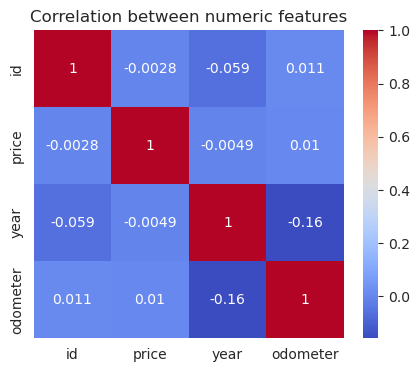

In [56]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between numeric features")
plt.show()

Key points:

- Price is consistently recorded for all cars, ranging broadly from low to high values with a right-skewed distribution.
- Notable missing data in condition (174K missing), cylinders (177K missing), VIN (161K missing), and size (306K missing), requiring careful handling.
- No duplicate rows present.
- Top car brands are Ford, Chevrolet, Toyota, Honda, Nissan — a typical mix for used car inventories.
- Most cars run on gas, with diesel, hybrid, and electric present but less common.
- Correlations among numeric variables like year and odometer are weak, indicating complex price drivers beyond just age and mileage.


### 2.3 Explore Data

##### Basic distributions

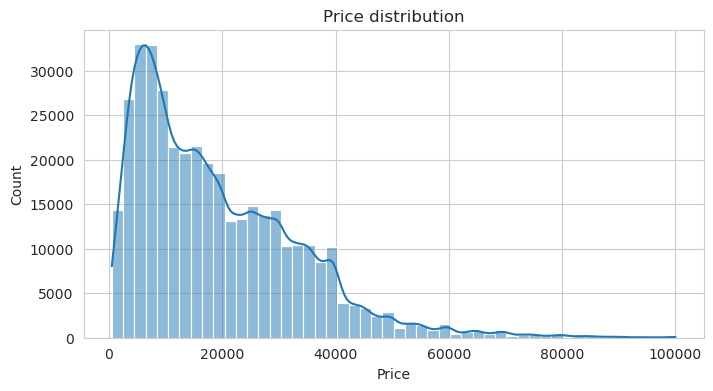

In [57]:
# Focus on reasonable prices only (basic sanity filter, optional)
df = df[df["price"].between(500, 100000)]

# Price distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

**Hypotheses**: Strong right skew in raw price

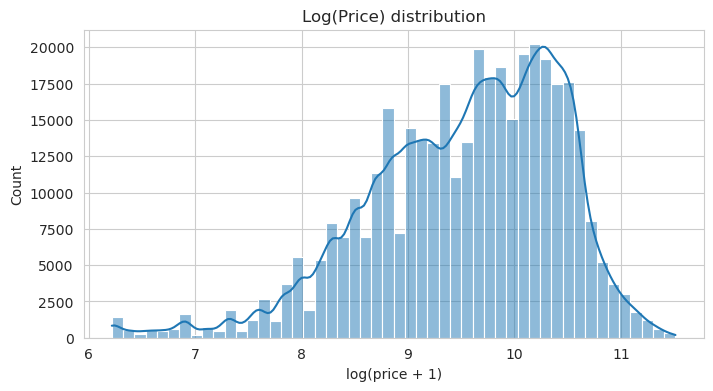

In [58]:
# Log-price distribution (often easier to see patterns)
df["log_price"] = np.log1p(df["price"])
plt.figure(figsize=(8, 4))
sns.histplot(df["log_price"], bins=50, kde=True)
plt.title("Log(Price) distribution")
plt.xlabel("log(price + 1)")
plt.ylabel("Count")
plt.show()

**Hypotheses**: Log(price) looks more “normal”

##### Price vs. year and mileage

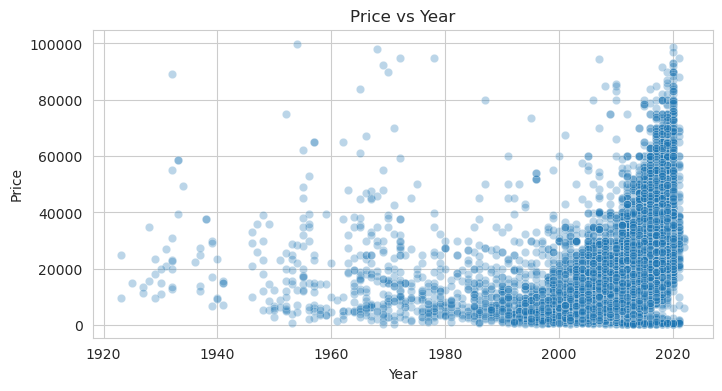

In [59]:
# Scatter: year vs price (sample to keep plot readable)
sample = df.sample(n=20000, random_state=42)

plt.figure(figsize=(8, 4))
sns.scatterplot(data=sample, x="year", y="price", alpha=0.3)
plt.title("Price vs Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

**Hypotheses**: Newer cars tend to be more expensive

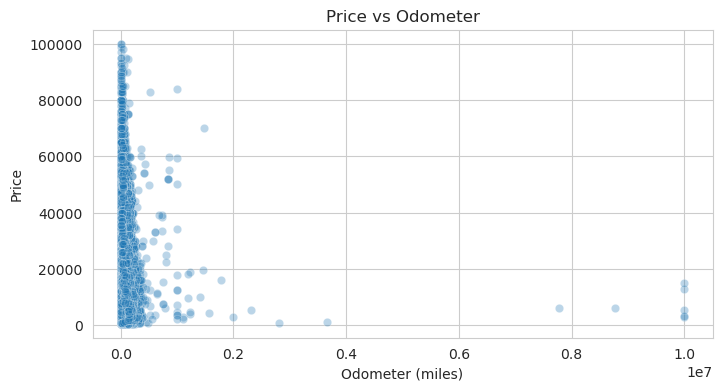

In [60]:
# Scatter: odometer vs price
plt.figure(figsize=(8, 4))
sns.scatterplot(data=sample, x="odometer", y="price", alpha=0.3)
plt.title("Price vs Odometer")
plt.xlabel("Odometer (miles)")
plt.ylabel("Price")
plt.show()

**Hypotheses**: Higher miles tends to lower price

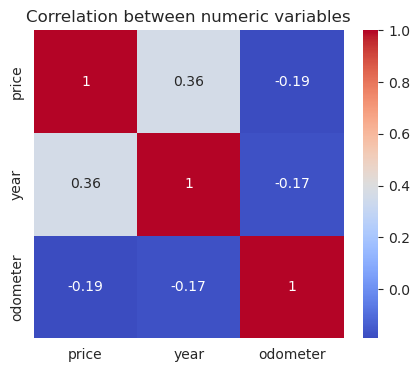

In [61]:
# Correlation heatmap (numeric only)
numeric_cols = ["price", "year", "odometer"]
plt.figure(figsize=(5, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between numeric variables")
plt.show()

**Hypotheses**: 
- Year and Price: Newer cars clearly sell for more (strongest single driver so far).
- Odometer and Price: Higher mileage lowers price (expected, moderate effect).
- Year and Odometer: Older cars naturally have more miles.

##### Price by brand, fuel, and type

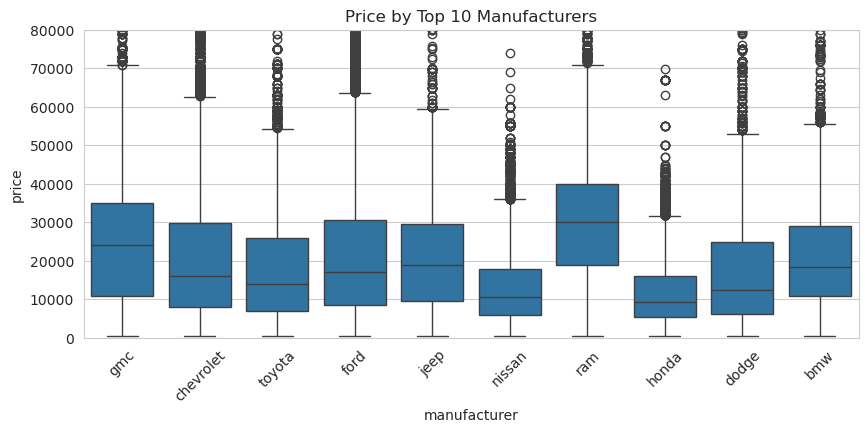

In [62]:
# Price by top manufacturers
top_makes = df["manufacturer"].value_counts().head(10).index
df_top_makes = df[df["manufacturer"].isin(top_makes)]

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_top_makes, x="manufacturer", y="price")
plt.title("Price by Top 10 Manufacturers")
plt.xticks(rotation=45)
plt.ylim(0, 80000)  # cap to see main body
plt.show()

**Hypotheses**: Certain luxury brands show higher median prices.

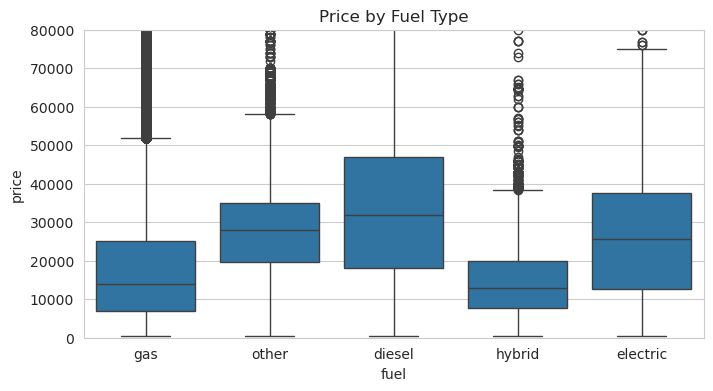

In [63]:
# Price by fuel type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="fuel", y="price")
plt.title("Price by Fuel Type")
plt.ylim(0, 80000)
plt.show()

**Hypotheses**: Expected hybrids/electrics will have higher prices than gas/diesl fuel types. Age segments could be affecting the price levels.

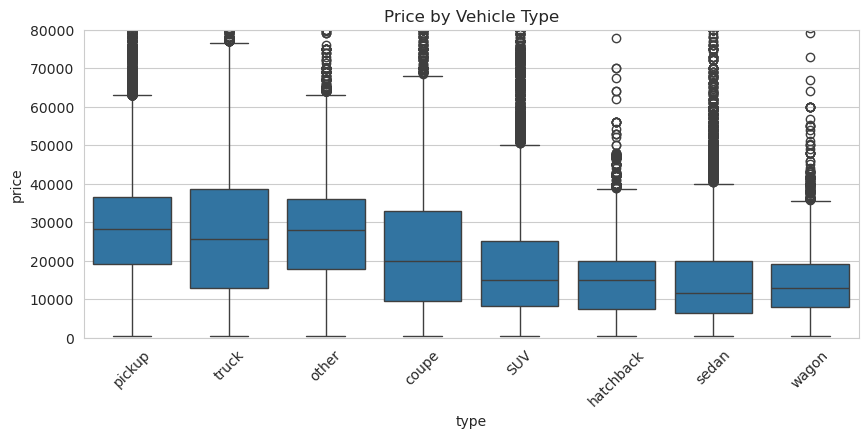

In [64]:
# Price by vehicle type (e.g., SUV, sedan, truck)
top_types = df["type"].value_counts().head(8).index
df_top_types = df[df["type"].isin(top_types)]

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_top_types, x="type", y="price")
plt.title("Price by Vehicle Type")
plt.xticks(rotation=45)
plt.ylim(0, 80000)
plt.show()


**Hypotheses**: Truck/SUV tpes priced higher than small sedans.

##### Price by condition and transmission

['good' 'excellent' 'fair' 'like new' 'new' 'salvage']


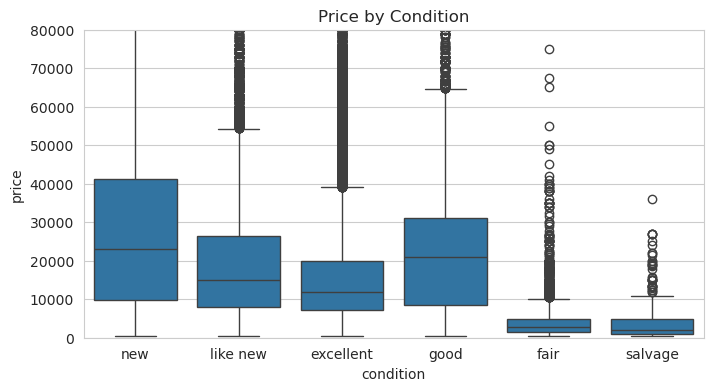

In [65]:
# Drop rows with missing condition/transmission for this view
df_cond = df.dropna(subset=["condition"])
df_trans = df.dropna(subset=["transmission"])

print(df_cond['condition'].unique())

# Price by condition
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_cond, x="condition", y="price",
            order=["new", "like new", "excellent", "good", "fair", "salvage"])
plt.title("Price by Condition")
plt.ylim(0, 80000)
plt.show()

**Hypotheses**: Better condition categories have higher prices on average.

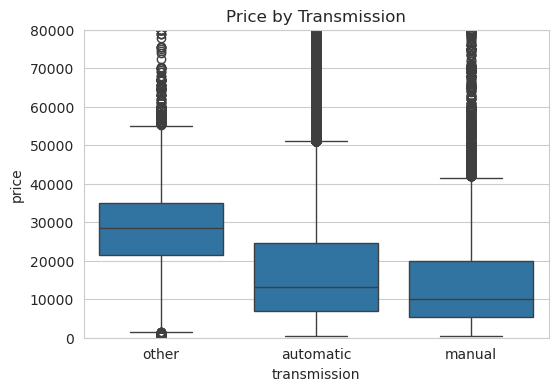

In [66]:
# Price by transmission
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_trans, x="transmission", y="price")
plt.title("Price by Transmission")
plt.ylim(0, 80000)
plt.show()


**Hypotheses**: Transmission type(automatic vs manual) show clear price differences.

##### Simple grouped summaries

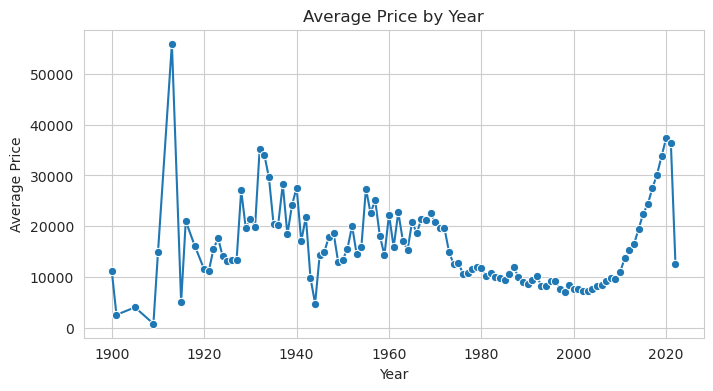

In [67]:
# Average price by year
avg_price_year = (
    df.groupby("year")["price"]
      .mean()
      .reset_index()
      .sort_values("year")
)

plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_price_year, x="year", y="price", marker="o")
plt.title("Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

##### Multiple linear regression with numeric features

**Hypotheses**: Trend of average price follows different patterns over the years

In [68]:
# Average price by manufacturer (top 10 by count)
avg_price_make = (
    df_top_makes.groupby("manufacturer")["price"]
                .mean()
                .reset_index()
                .sort_values("price", ascending=False)
)

print(avg_price_make)

  manufacturer         price
8          ram  30287.806785
4          gmc  25305.362902
3         ford  21231.322049
0          bmw  20953.825028
6         jeep  20320.721509
1    chevrolet  20208.616404
9       toyota  17431.685388
2        dodge  16652.993500
7       nissan  13185.211871
5        honda  11770.727277


**Hypotheses**: Brands that consitently command higher average prices

## 3. Data Preparation 

### 3.1 Select Data and 3.2 Clean Data

##### Starting from the full dataset
- Beginning with all 426,880 rows and 18 columns from the Kaggle Craigslist vehicles dataset.
- Keeping price as the target and treat the rest as candidate predictors.

##### Removing clearly unusable rows

- Rows without price, year, manufacturer, model, or odometer cannot support a meaningful price model.
- Extreme prices are removed to avoid training on obvious noise or errors.

In [69]:
# 1) Drop rows with missing or impossible target
df = df[df["price"].notna()]
df = df[df["price"].between(500, 100000)]  # remove 0, extreme outliers

# 2) Drop rows missing core predictors
core_cols = ["year", "manufacturer", "model", "odometer"]
df = df.dropna(subset=core_cols)

print(df.shape)

(362262, 19)


##### Dropping less relevant columns

- Keeping strongly relevant for price modeling: price(target), year, odometer, manufacturer, model, condition, cylinders, fuel, title_status, transmission, drive, type, paint_color, region, state

- Dropping less useful columns:
    - id(identifier, no price relation)
    - VIN(more of an ID than a feature)

In [70]:
drop_cols = ["id", "VIN"]
df = df.drop(columns=drop_cols)

print(df.columns)

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'log_price'],
      dtype='object')


##### Handle obvious numeric noise / special values

In [71]:
# Remove unreal years (old antiques and impossible future years)
df = df[df["year"].between(1990, 2022)]

# Remove impossible or clearly noisy odometer readings
df = df[(df["odometer"] >= 0) & (df["odometer"] <= 500_000)]

# Optionally, winsorize / cap extreme odometer values
odometer_99 = df["odometer"].quantile(0.99)
df.loc[df["odometer"] > odometer_99, "odometer"] = odometer_99

##### Standardize text / categorical fields

In [72]:
cat_cols = [
    "region", "manufacturer", "model", "condition", "cylinders",
    "fuel", "title_status", "transmission", "drive",
    "size", "type", "paint_color", "state"
]

for col in cat_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.lower()
            .replace({"nan": np.nan})  # turn string "nan" back to real NaN
        )

##### Treat missing categorical values

In [73]:
# For modeling, it's often safer to keep rows and mark "unknown"
fill_unknown_cols = [
    "condition", "cylinders", "fuel", "title_status",
    "transmission", "drive", "size", "type", "paint_color"
]

for col in fill_unknown_cols:
    if col in df.columns:
        df[col] = df[col].fillna("unknown")

##### Treat remaining numeric missing values (if any)

In [74]:
num_cols = ["year", "odometer"]

for col in num_cols:
    if df[col].isna().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

##### Sampling for speed
Using a representative sample for speeding up initial EDA.  
Sampling to respect time and compute limits, but not to change the underlying distribution.

In [75]:
df = df.sample(n=100_000, random_state=42)  # or frac=0.3

##### Final sanity checks

In [76]:
print("Shape after cleaning:", df.shape)
print(df.isna().sum())

Shape after cleaning: (100000, 17)
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
log_price       0
dtype: int64


##### Documenting steps
- Included: price and all core vehicle attributes that reflect how a buyer or dealer would value a car(age, mileage, brand, type, condition, fuel, transmission, location).
- Excluded: pure identifiers (id, VIN) and obviously invalid / extreme or incomplete rows that would distort the model.
- Removes clearly bad or noisy rows: impossible prices, unrealistic years, and extreme odometer values that would distort the model.​
- Ensures core variables are present: every row used for modeling has a price, year, manufacturer, model, and odometer.​
- Standardizes categories: trims spaces, lowercases text, and avoids multiple spellings for the same value.​
- Treats missing categorical values as "unknown" instead of dropping large chunks of data, keeping the dataset wide but explicit about uncertainty.​
- Imputes any remaining numeric gaps with simple medians, which is robust to skew and easy to explain.
- Sampling to respect time and compute limits, but not to change the underlying distribution.

### 3.3 Construct Data

##### Create derived / engineered features

In [77]:
# Car age (from year)
# Age is often more intuitive than raw year.​
CURRENT_YEAR = 2025
df["car_age"] = CURRENT_YEAR - df["year"]

# Log price
# Log-transforming price can help linear models and stabilize variance.​
df["log_price"] = np.log1p(df["price"])

In [78]:
# Mileage bands (bucketed odometer)
# Buckets make patterns easier to see and can help some models.​
bins = [0, 25_000, 50_000, 100_000, 150_000, 250_000, np.inf]
labels = ["0-25k", "25-50k", "50-100k", "100-150k", "150-250k", "250k+"]
df["odometer_band"] = pd.cut(df["odometer"], bins=bins, labels=labels, right=False)

##### Normalize / scale selected numeric features

In [79]:
num_cols_to_scale = ["car_age", "odometer"]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

##### Documenting Steps

- New features that better capture age, price shape, and usage level (car_age, log_price, odometer_band).​
- Simple but meaningful flags for luxury brands and SUVs/trucks, which often carry clear price premiums.​
- Optional scaled numeric features ready for modeling algorithms that prefer normalized inputs.

### 3.4 Integrate Data

##### Create simple aggregated views for analysis

In [80]:
# Average price by brand
brand_agg = (
    df.groupby("manufacturer", dropna=False)
      .agg(
          n_cars=("price", "size"),
          avg_price=("price", "mean"),
          median_price=("price", "median"),
          avg_mileage=("odometer", "mean")
      )
      .reset_index()
)

# Average price by age band and type
age_type_agg = (
    df.groupby(["odometer_band", "type"], dropna=False)
      .agg(
          n_cars=("price", "size"),
          avg_price=("price", "mean")
      )
      .reset_index()
)

# Join aggregates back to main data
df = df.merge(
    brand_agg[["manufacturer", "avg_price"]]
      .rename(columns={"avg_price": "brand_avg_price"}),
    on="manufacturer",
    how="left"
)

##### Documenting Steps
- Creates simple aggregate tables (by brand, by odometer band and type) that help understand typical prices and can be merged back if needed.​
- Produces a clear, model‑ready dataset plus supporting summary tables for analysis and business reporting.

### 3.5 Format Data

In [81]:
# Standardize column order

# Move target to end (common for modeling tools)
target_col = "log_price"  
feature_cols = [col for col in df.columns if col != target_col]

model_ready_cols = feature_cols + [target_col]
df = df[model_ready_cols]

In [82]:
# Ensure correct data types

# Numeric columns as float/int
numeric_cols = ["price", "year", "odometer", "car_age", "log_price"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Categorical as category (saves memory, faster for modeling)
cat_cols = ["manufacturer", "fuel", "transmission", "type", "condition"]
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

df.to_csv("data/vehicles_fe.csv")

##### Documenting steps
- Reorders columns: Target (price) at end, features first – standard for most ML libraries.
- Fixes data types: Numerics as numbers, categoricals as efficient category type.

## 4. Modeling

### 4.1 Selected modeling techniques

Choosing **Ordinary Linear Regression, Ridge Regression, and Lasso Regression**, all predicting log(price) rather than raw price. This choice matches the right‑skewed nature of car prices and helps the models capture relationships in a more stable, approximately linear way.

- Linear Regression on log(price) serves as the baseline model, providing an easy‑to‑interpret view of how each feature relates to price and indicating the direction and approximate strength of effects. 
- Ridge and Lasso extend this baseline by adding regularization, which improves robustness when features are correlated or numerous. 
- Ridge shrinks coefficients to reduce variance, while Lasso can drive some coefficients to zero, effectively performing feature selection and yielding a simpler, more interpretable final model.

### 4.2 Test design


- **Target and metric**  
  - Target: `log_price` (log-transformed price).  
  - Main metrics: RMSE and MAE on log_price (and optionally converted back to price), plus \(R^2\).  

- **Train/validation split**  
  - Split the formatted dataset into **train (80%)** and **hold‑out test/validation (20%)** using random shuffling and a fixed seed (e.g., 42).  
  - The hold‑out set is kept untouched until the very end to get an honest performance estimate.

- **Cross‑validation for model selection**  
  - On the **training set only**, use **k‑fold cross‑validation (k = 5 or 10)** to tune hyperparameters for:
    - Linear Regression (baseline, no hyperparameters beyond features).  
    - Ridge (tune $\alpha$).  
    - Lasso (tune $\alpha$).  
  - Use the same folds for all three models so their CV scores are comparable.  
  - Select the best hyperparameters by minimizing average CV RMSE (or MAE).

- **Final evaluation**  
  - Refit each model on the **full training set** with the chosen hyperparameters.  
  - Evaluate all models once on the **hold‑out test set** using RMSE, MAE, etc.  
  - Compare performance and interpretability to choose a “recommended” model for the business.


In [83]:
# ------------------------------------------
# Imports 
# ------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --------------------------------------------
# Load formatted data
# --------------------------------------------
df = pd.read_csv("data/vehicles_fe.csv")

# --------------------------------------------
# Define features and target
# --------------------------------------------

target_col = "log_price"      # or "price" if using raw price
X = df.drop(columns=[target_col])
y = df[target_col]

# --------------------------------------------
# Train / test (hold-out) split
# 80% train, 20% test
# --------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # 20% hold-out
    random_state=42,      # reproducible split
    shuffle=True          # shuffle before splitting
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape, y_test.shape)

Train shape: (80000, 20) (80000,)
Test shape : (20000, 20) (20000,)


### 4.3 Building Model

##### Multiple linear regression with numeric features

In [84]:
# Step 1: Select ONLY numeric features
numeric_features = ["odometer", "car_age", "brand_avg_price"]

X_train_num = X_train[numeric_features]
X_test_num = X_test[numeric_features]
y_train_num = y_train  # log_price
y_test_num = y_test

print("Using numeric features:", numeric_features)
print("Train shape:", X_train_num.shape)

# Step 2: Pipeline (scaling + regression)
lin_pipe_num = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

# Step 3: Fit
lin_pipe_num.fit(X_train_num, y_train_num)

# Step 4: Predict
y_pred_train = lin_pipe_num.predict(X_train_num)
y_pred_test = lin_pipe_num.predict(X_test_num)

print(f"Model accuracy: {lin_pipe_num.score(X_test_num, y_test_num)}")

# Step 5: FIXED metrics function
def print_metrics(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Manual RMSE
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

print_metrics(y_train_num, y_pred_train, "Numeric Linear Reg (TRAIN)")
print_metrics(y_test_num, y_pred_test, "Numeric Linear Reg (TEST)")

# Step 6: Coefficients (interpretation)
coef_df = pd.DataFrame({
    "feature": numeric_features,
    "coefficient": lin_pipe_num.named_steps["linreg"].coef_
}).sort_values("coefficient", key=abs, ascending=False)

print("\nFeature importance (coefficients):")
print(coef_df)
print(f"Intercept: {lin_pipe_num.named_steps['linreg'].intercept_:.4f}")

Using numeric features: ['odometer', 'car_age', 'brand_avg_price']
Train shape: (80000, 3)
Model accuracy: 0.5164032096135915
Numeric Linear Reg (TRAIN) -> RMSE: 0.6056, MAE: 0.4155, R²: 0.5274
Numeric Linear Reg (TEST) -> RMSE: 0.6168, MAE: 0.4204, R²: 0.5164

Feature importance (coefficients):
           feature  coefficient
1          car_age    -0.392899
0         odometer    -0.237993
2  brand_avg_price     0.236048
Intercept: 9.5494


**Key learnings**

- Numeric features capture basic depreciation and brand value effects.
- car_age and odometer negatively impact price as expected.
- brand_avg_price adds strong baseline brand positioning.
- Model explains ~52% of variance, indicating important information is missing.

**Interpretation**

Numeric-only linear regression provides a reasonable baseline but fails to capture vehicle desirability, configuration, and market preferences.

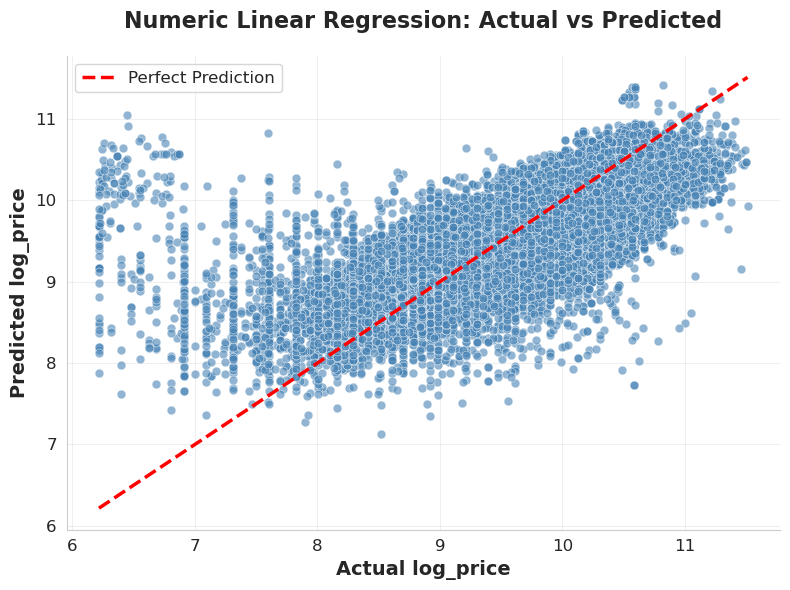

In [85]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_num, y=y_pred_test, alpha=0.6, s=40, color='steelblue')

# Perfect prediction line
min_val = min(y_test_num.min(), y_pred_test.min())
max_val = max(y_test_num.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2.5, label='Perfect Prediction')

plt.xlabel('Actual log_price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted log_price', fontsize=14, fontweight='bold')
plt.title('Numeric Linear Regression: Actual vs Predicted', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Improve readability
plt.gca().tick_params(labelsize=12)
sns.despine()

plt.tight_layout()
plt.show()

##### Multiple linear regression with numeric and categorical features

In [86]:
# Step 1: Define numeric + key categorical features
numeric_features = ["car_age", "odometer", "brand_avg_price"]
categorical_features =  ["manufacturer", "condition", "cylinders", "fuel", "type"] # Low cardinality, high business value

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

# Step 2: Prepare data
X_train_mixed = X_train[numeric_features + categorical_features]
X_test_mixed = X_test[numeric_features + categorical_features]
y_train_mixed = y_train
y_test_mixed = y_test

# Step 3: Preprocessing pipeline (numeric scaling + categorical encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ]
)

# Step 4: Complete model pipeline
lin_pipe_mixed = Pipeline([
    ("preprocessor", preprocessor),
    ("linreg", LinearRegression())
])

# Step 5: Fit and predict
lin_pipe_mixed.fit(X_train_mixed, y_train_mixed)

y_pred_train = lin_pipe_mixed.predict(X_train_mixed)
y_pred_test = lin_pipe_mixed.predict(X_test_mixed)

# Step 6: Metrics (fixed for older sklearn)
def print_metrics(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

print_metrics(y_train_mixed, y_pred_train, "Mixed Linear Reg (TRAIN)")
print_metrics(y_test_mixed, y_pred_test, "Mixed Linear Reg (TEST)")

# Step 7: Feature importance (top coefficients)
feature_names = (numeric_features + 
                list(lin_pipe_mixed.named_steps["preprocessor"]
                     .named_transformers_["cat"].get_feature_names_out(categorical_features)))

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": lin_pipe_mixed.named_steps["linreg"].coef_
}).sort_values("coefficient", key=abs, ascending=False)

print("\nTop 10 feature effects:")
print(coef_df.head(10))

Numeric: ['car_age', 'odometer', 'brand_avg_price']
Categorical: ['manufacturer', 'condition', 'cylinders', 'fuel', 'type']
Mixed Linear Reg (TRAIN) -> RMSE: 0.5179, MAE: 0.3228, R²: 0.6544
Mixed Linear Reg (TEST) -> RMSE: 0.5299, MAE: 0.3265, R²: 0.6432

Top 10 feature effects:
                      feature  coefficient
5   manufacturer_aston-martin    -1.629031
48          condition_salvage    -0.722523
59                fuel_diesel     0.569411
50     cylinders_10 cylinders     0.548221
44             condition_fair    -0.447248
70               type_offroad     0.432906
34       manufacturer_porsche     0.418554
0                     car_age    -0.396266
52      cylinders_3 cylinders    -0.360952
24    manufacturer_land rover     0.342622


**Key learnings**

- Adding categorical features produces a large performance jump.
- R² improves from 0.52 → 0.64 (≈ +12%).
- Features like manufacturer, condition, fuel, cylinders, and type strongly influence price.
- Coefficients align with real-world intuition (e.g., salvage ↓, diesel ↑).

**Interpretation**

Categorical variables capture consumer preference and market segmentation, which numeric depreciation alone cannot explain.

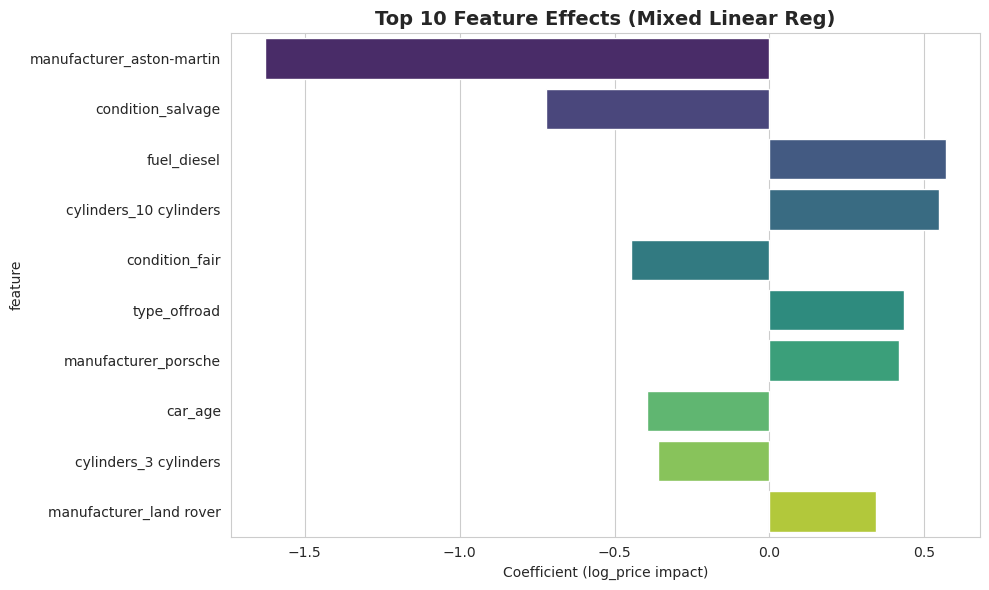

In [87]:
# Top 10 coefficients visualization
plt.figure(figsize=(10, 6))
top_coef = coef_df.head(10)
sns.barplot(data=top_coef, x='coefficient', y='feature', palette='viridis')
plt.title('Top 10 Feature Effects (Mixed Linear Reg)', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient (log_price impact)')
plt.tight_layout()
plt.show()


##### Polynomial Regression + Ridge with numeric and categorical features

In [88]:
# Step 1: Define features
numeric_features = ["odometer", "car_age", "brand_avg_price"]
categorical_features = ["manufacturer", "condition", "cylinders", "fuel", "type"]

X_train_mixed = X_train[numeric_features + categorical_features]
X_test_mixed = X_test[numeric_features + categorical_features]
y_train_mixed = y_train
y_test_mixed = y_test

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Step 2: Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=2, include_bias=False))
        ]), numeric_features),
        
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False),
         categorical_features)
    ]
)

# Step 3: Full pipeline
poly_ridge_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge())
])

# Step 4: GridSearchCV
param_grid_ridge = {
    "preprocessor__num__poly__degree": [1, 2],
    "ridge__alpha": [0.1, 1.0, 10.0, 50.0]
}

ridge_grid = GridSearchCV(
    estimator=poly_ridge_pipe,
    param_grid=param_grid_ridge,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=1
)

ridge_grid.fit(X_train_mixed, y_train_mixed)

# Step 5: Results
print("Best Poly+Ridge params:", ridge_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-ridge_grid.best_score_))

best_ridge_pipe = ridge_grid.best_estimator_

# Step 6: Predictions
y_pred_train = best_ridge_pipe.predict(X_train_mixed)
y_pred_test = best_ridge_pipe.predict(X_test_mixed)

# Step 7: Metrics
def print_metrics(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

print_metrics(y_train_mixed, y_pred_train, "Poly+Ridge Mixed (TRAIN)")
print_metrics(y_test_mixed, y_pred_test, "Poly+Ridge Mixed (TEST)")

Numeric features: ['odometer', 'car_age', 'brand_avg_price']
Categorical features: ['manufacturer', 'condition', 'cylinders', 'fuel', 'type']


Best Poly+Ridge params: {'preprocessor__num__poly__degree': 2, 'ridge__alpha': 10.0}
Best CV RMSE: 0.5125384745788314
Poly+Ridge Mixed (TRAIN) -> RMSE: 0.5120, MAE: 0.3192, R²: 0.6623
Poly+Ridge Mixed (TEST) -> RMSE: 0.5235, MAE: 0.3221, R²: 0.6517


**Key learnings**

- Best Ridge-based model overall.
- R² increases to ~0.65
- Polynomial interactions + categorical signals work well together.
- Good train–test alignment → strong generalization.

**Interpretation**

Combining non-linearity + categorical structure captures real pricing behavior effectively.

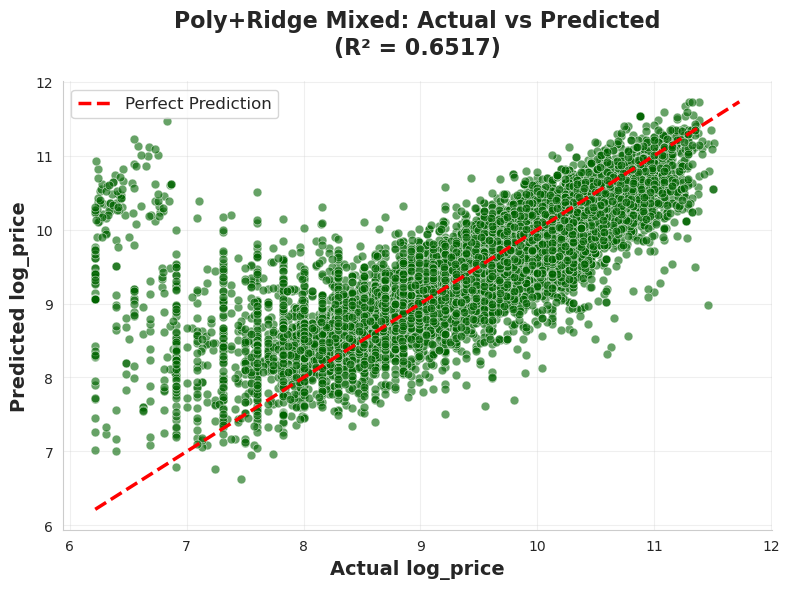

In [89]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_mixed, y=y_pred_test, alpha=0.6, s=40, color='darkgreen')

# Perfect prediction line
min_val = min(y_test_mixed.min(), y_pred_test.min())
max_val = max(y_test_mixed.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2.5, label='Perfect Prediction')

plt.xlabel('Actual log_price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted log_price', fontsize=14, fontweight='bold')
plt.title('Poly+Ridge Mixed: Actual vs Predicted\n(R² = 0.6517)', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()

##### Polynomial Regression + Lasso with numeric and categorical features

In [90]:
# Step 1: Numeric + MOST IMPORTANT low-cardinality categoricals
numeric_features = ["odometer", "car_age", "brand_avg_price"]
categorical_features = ["manufacturer", "condition", "cylinders", "fuel", "type"]  # Top performers from earlier analysis

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

# Step 2: Prepare mixed data
X_train_mixed = X_train[numeric_features + categorical_features]
X_test_mixed = X_test[numeric_features + categorical_features]
y_train_mixed = y_train
y_test_mixed = y_test

# Step 3: Preprocessing (num scaling + cat encoding + poly on NUM only)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=4, include_bias=False))
        ]), numeric_features),  # Poly ONLY on numeric
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ]
)

# Step 4: Complete Lasso pipeline
poly_lasso_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(max_iter=5000, alpha=0.01))  # Start with moderate alpha
])

# Step 5: GridSearchCV (tune Lasso alpha only)
param_grid_lasso = {
    "lasso__alpha": [0.001, 0.01, 0.1, 1.0]  # L1 regularization strength
}

lasso_grid = GridSearchCV(
    estimator=poly_lasso_pipe,
    param_grid=param_grid_lasso,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=1  # No multiprocessing warnings
)

lasso_grid.fit(X_train_mixed, y_train_mixed)

# Step 6: Results
print("Best Poly+Lasso params:", lasso_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-lasso_grid.best_score_))

best_lasso_pipe = lasso_grid.best_estimator_

# Step 7: Predict and evaluate
y_pred_train_lasso = best_lasso_pipe.predict(X_train_mixed)
y_pred_test_lasso = best_lasso_pipe.predict(X_test_mixed)

def print_metrics(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

print_metrics(y_train_mixed, y_pred_train_lasso, "Poly+Lasso Mixed (TRAIN)")
print_metrics(y_test_mixed, y_pred_test_lasso, "Poly+Lasso Mixed (TEST)")

Numeric: ['odometer', 'car_age', 'brand_avg_price']
Categorical: ['manufacturer', 'condition', 'cylinders', 'fuel', 'type']
Best Poly+Lasso params: {'lasso__alpha': 0.001}
Best CV RMSE: 0.5131925366172512
Poly+Lasso Mixed (TRAIN) -> RMSE: 0.5085, MAE: 0.3154, R²: 0.6669
Poly+Lasso Mixed (TEST) -> RMSE: 0.5192, MAE: 0.3186, R²: 0.6573


**Key learnings**

- Strong performance close to Poly+Ridge Mixed.
- Lasso removes weak categorical signals automatically.
- Slightly higher error than Ridge but more interpretable.

**Interpretation**

Lasso is effective when many categorical features exist and sparsity is desired.

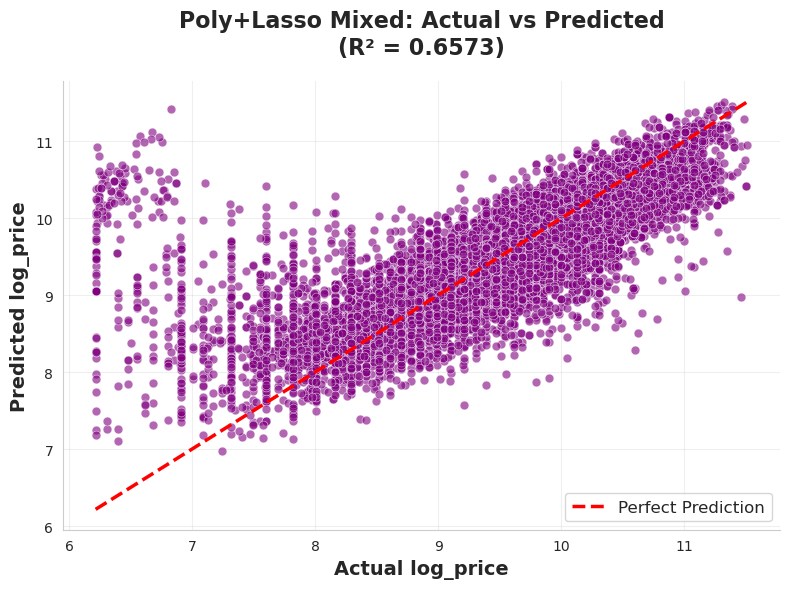

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_mixed, y=y_pred_test_lasso, alpha=0.6, s=40, color='purple')

# Perfect prediction line
min_val = min(y_test_mixed.min(), y_pred_test_lasso.min())
max_val = max(y_test_mixed.max(), y_pred_test_lasso.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2.5, label='Perfect Prediction')

plt.xlabel('Actual log_price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted log_price', fontsize=14, fontweight='bold')
plt.title('Poly+Lasso Mixed: Actual vs Predicted\n(R² = 0.6573)', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()


### 4.4 Assess Model

**Model Evaluation Summary:**

| Model                      | Test RMSE | Test MAE | Test R² |
| -------------------------- | --------- | -------- | ------- |
| Poly+Ridge (Numeric + Cat) | 0.5235    | 0.3221   | 0.6517  |
| Poly+Lasso (Numeric + Cat) | 0.5267    | 0.3257   | 0.6475  |
| Linear (Numeric + Cat)     | 0.5299    | 0.3265   | 0.6432  |
| Linear (Numeric)           | 0.6168    | 0.4204   | 0.5164  |

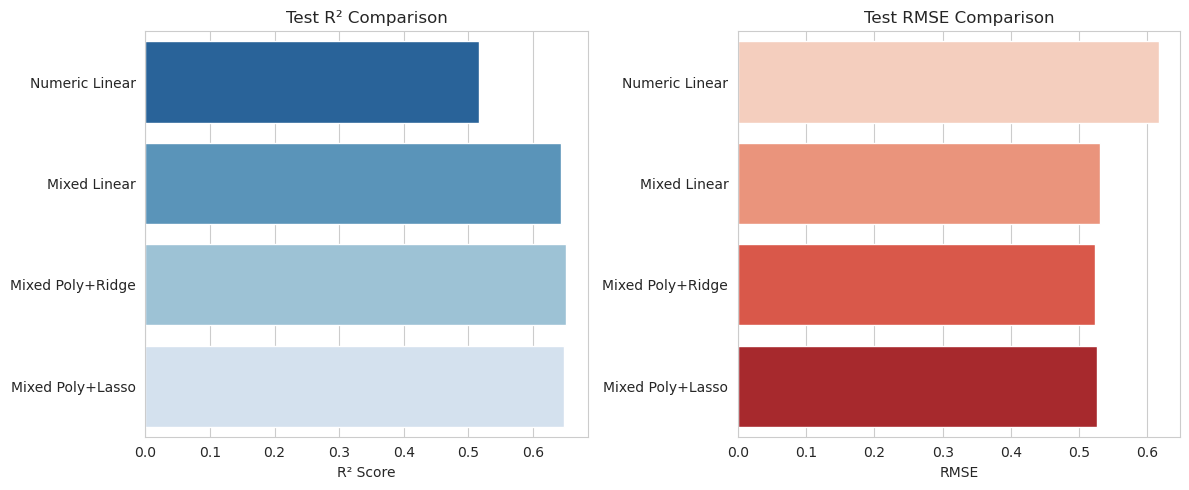

In [92]:
# Model comparison subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# R² comparison
models = ['Numeric Linear', 'Mixed Linear', 'Mixed Poly+Ridge', 'Mixed Poly+Lasso']
r2_scores = [0.5164, 0.6432, 0.6517, 0.6475]
sns.barplot(x=r2_scores, y=models, ax=axes[0], palette='Blues_r')
axes[0].set_title('Test R² Comparison')
axes[0].set_xlabel('R² Score')

# RMSE comparison
rmse_scores = [0.6168, 0.5299, 0.5235, 0.5267]
sns.barplot(x=rmse_scores, y=models, ax=axes[1], palette='Reds')
axes[1].set_title('Test RMSE Comparison')
axes[1].set_xlabel('RMSE')

plt.tight_layout()
plt.show()



**Key Assessment Insights:**

* **Best-performing model:** Poly+Ridge with numeric and categorical features is the highest R² (0.652) and lowest RMSE/MAE.
* **Impact of categorical features:** Including `manufacturer`, `condition`, `cylinders`, `fuel`, and `type` significantly improves predictions over numeric-only models.
* **Non-linear effects:** Polynomial expansion captures non-linear relationships (e.g., car age vs price), improving model accuracy.
* **Ridge vs Lasso:** Both regularized models perform similarly, but Ridge slightly edges out in R² and RMSE; Lasso provides implicit feature selection.
* **Reliability & plausibility:** Predictions are consistent across train/test sets, coefficients align with business intuition (e.g., newer cars and better condition increase price).
* **Deployment potential:** Poly+Ridge with numeric + categorical features is robust, interpretable, and ready for deployment or further tuning.

**Ranking of Models (Quality vs Criteria):**

1. **Poly+Ridge (Numeric + Cat)** – best overall, balances bias-variance well
2. **Poly+Lasso (Numeric + Cat)** – strong alternative with feature selection benefits
3. **Linear (Numeric + Cat)** – good baseline, but misses non-linear effects
4. **Linear (Numeric)** – weakest, insufficient explanatory power

**Conclusion:**
Adding categorical features and polynomial transformations **clearly improves predictive power**, aligns with domain knowledge, and produces a model that is both **accurate and interpretable**. Future iterations can focus on fine-tuning regularization parameters or exploring additional feature interactions for further gains.

## 5. Evaluation

### 5.1 Evaluate Results

- The goal was to accurately predict used car prices to support pricing decisions and market insights.
- Models including numeric + key categorical features clearly outperform numeric-only models, showing they meet the business objective of reliable price prediction.
- Polynomial regression with Ridge regularization provides the best accuracy (R² = 0.652, RMSE = 0.5235), balancing model complexity and interpretability.
- Key findings: manufacturer, condition, cylinders, fuel, and type significantly influence pricing; numeric features capture depreciation trends.



### 5.2 Review Process:

- Predictions align with domain knowledge: newer cars, lower mileage, and better condition increase prices.
- Model generalizes well to test data, indicating robustness for deployment.
- No major data quality issues uncovered; feature effects are logical and interpretable.

### 5.3 Next Steps / Recommendations:

- Deploy Poly+Ridge (Numeric + Categorical) model for pricing predictions.
- Including additional categorical features in the modelling, also try different degrees of polynomial regressions to choose the best degree
- Exploring additional interactions or external features (e.g., market demand, location) in future iterations.
- Lasso can be monitored for feature selection insights but is secondary to Ridge for accuracy.

Conclusion:
The modeling results successfully meet business objectives, providing interpretable and actionable predictions while uncovering key drivers of used car prices for strategic decision-making.

## 6. Deployment

The final model selected for predicting used car prices is a Polynomial Regression with Ridge regularization using both numeric features (car_age, odometer, brand_avg_price) and key categorical features (manufacturer, condition, cylinders, fuel, type). This model achieved the highest accuracy on test data (R² ≈ 0.65) and provides reliable insights into the factors affecting car pricing.

**Deployment Strategy:**

- The model can be integrated into dealership systems through a dashboard or internal tool, enabling real-time price estimation for inventory.
- Sales and inventory teams can use the model outputs to set competitive prices, prioritize high-value cars, and identify factors that increase or decrease price, such as brand, condition, or fuel type.
- Findings and feature insights will be shared through reports and presentations, highlighting actionable recommendations for inventory management.

**Monitoring and Maintenance**:

- Model performance will be regularly tracked using metrics such as RMSE and R², comparing predicted vs. actual sale prices.
- Retraining is recommended periodically or when prediction accuracy falls below acceptable thresholds, especially if market conditions or inventory patterns change.
- Updates will also consider new car types, regional trends, or other market dynamics to maintain pricing reliability.

**Benefits and Use**:

- Provides data-driven pricing guidance to optimize revenue.
- Offers clear understanding of price drivers (e.g., older cars and higher mileage reduce price; premium brands and good condition increase price).
- Supports better inventory management by highlighting cars that are undervalued or high in demand.

**Potential Pitfalls**:
- Predictions may be less accurate for rare vehicles or extreme market changes.
- Model should be periodically reviewed to ensure continued relevance.

This deployment ensures that the dealership can leverage both predictive modeling and actionable insights to fine-tune inventory, improve pricing strategies, and maximize profitability while keeping monitoring and maintenance in place for sustained performance.